# IMPALA Results

In [1]:
import sys
sys.path.insert(0, "../")
from  Utils.plot import plot_IMPALA_session
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import pandas as pd

## Loading metadata

In [2]:
def find_xpid_from_mapname(map_name, load_dir='../logs/torchbeast'):
    all_files = os.listdir(load_dir)
    xpid_files = [f for f in all_files if 'torchbeast' in f]
    matching_xpids = []
    for xpid in xpid_files:
        with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
            data = json.load(json_file)
            flags = data['args']
        if flags['map_name'] == map_name:
            print("Matchig xpid: ", xpid)
            print("Map name: ", flags['map_name'])
            print("Batch size: ", flags['batch_size'])
            print("Total steps: ", flags['total_steps'],'\n')
            matching_xpids.append(xpid)
    return matching_xpids

In [3]:
# search for xpids starting from the map name
game_names = {1:'MoveToBeacon',
              2:'CollectMineralShards',
              3:'DefeatRoaches',
              4:'FindAndDefeatZerglings',
              5:'DefeatZerglingsAndBanelings',
              6:'CollectMineralsAndGas',
              7:'BuildMarines'
              }
map_name = game_names[2]
matching_xpids = find_xpid_from_mapname(map_name)
matching_xpids

Matchig xpid:  torchbeast-20200803-172924
Map name:  CollectMineralShards
Batch size:  60
Total steps:  240000 

Matchig xpid:  torchbeast-20200824-101933
Map name:  CollectMineralShards
Batch size:  20
Total steps:  240000 

Matchig xpid:  torchbeast-20200727-113227
Map name:  CollectMineralShards
Batch size:  40
Total steps:  3600000 

Matchig xpid:  torchbeast-20200805-172157
Map name:  CollectMineralShards
Batch size:  20
Total steps:  240000 

Matchig xpid:  torchbeast-20200824-115103
Map name:  CollectMineralShards
Batch size:  20
Total steps:  240000 

Matchig xpid:  torchbeast-20200803-183002
Map name:  CollectMineralShards
Batch size:  60
Total steps:  240000 

Matchig xpid:  torchbeast-20200803-165741
Map name:  CollectMineralShards
Batch size:  60
Total steps:  240000 

Matchig xpid:  torchbeast-20200803-143954
Map name:  CollectMineralShards
Batch size:  20
Total steps:  240000 

Matchig xpid:  torchbeast-20200804-132417
Map name:  CollectMineralShards
Batch size:  20
Total

['torchbeast-20200803-172924',
 'torchbeast-20200824-101933',
 'torchbeast-20200727-113227',
 'torchbeast-20200805-172157',
 'torchbeast-20200824-115103',
 'torchbeast-20200803-183002',
 'torchbeast-20200803-165741',
 'torchbeast-20200803-143954',
 'torchbeast-20200804-132417',
 'torchbeast-20200803-160908',
 'torchbeast-20200803-152318',
 'torchbeast-20200724-153342',
 'torchbeast-20200803-155749',
 'torchbeast-20200725-204918',
 'torchbeast-20200824-100329',
 'torchbeast-20200803-171349',
 'torchbeast-20200803-145104']

In [4]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200824"
hms = "115103"
load_dir = "../logs/torchbeast"
#xpid = 'torchbeast-%s-%s'%(ymd,hms)
xpid = "CollectMineralShards_v2_1"
#xpid = "FindAndDefeatZerglings_v2_1" # doesn't work
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [5]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  CollectMineralShards
Batch size:  20
Total steps:  6000000
Learning rate:  3e-05
Entropy cost:  0.0005


## Loading logs

In [6]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)

In [7]:
logs = logs[logs['mean_episode_return'].notna()]

In [8]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
3,3,1.598266e+09,180,492.875946,15.150001,482.562134,10.456675,-0.142867
7,7,1.598266e+09,420,5776.872070,20.000000,5094.208984,682.805298,-0.142102
11,11,1.598266e+09,660,2062.121094,18.700001,1791.377686,270.889832,-0.146420
15,15,1.598266e+09,900,2026.718750,15.300000,1755.969727,270.890686,-0.141624
19,19,1.598266e+09,1140,2771.680908,18.050001,2407.829102,363.995483,-0.143868
...,...,...,...,...,...,...,...,...
99996,99996,1.598400e+09,5999760,483.951935,101.000000,-3.987337,487.939575,-0.000300
99997,99997,1.598400e+09,5999820,434.886139,101.400002,-44.612244,479.498718,-0.000346
99998,99998,1.598400e+09,5999880,571.247192,91.666672,-83.437088,654.684509,-0.000270
99999,99999,1.598400e+09,5999940,503.570282,100.222221,-49.988159,553.558960,-0.000508


In [9]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

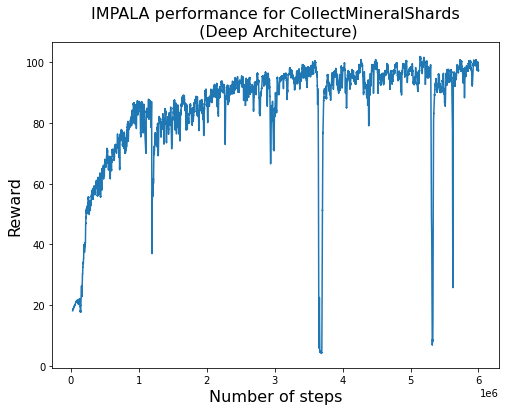

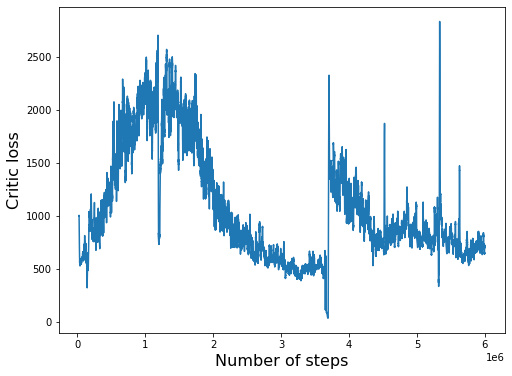

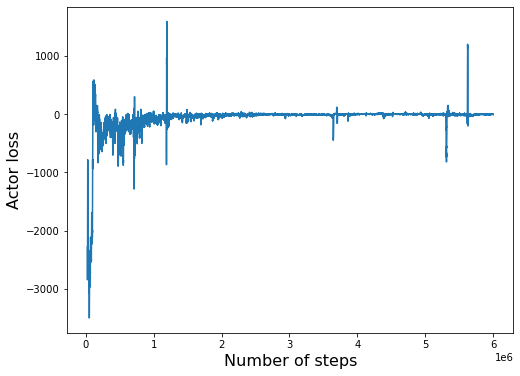

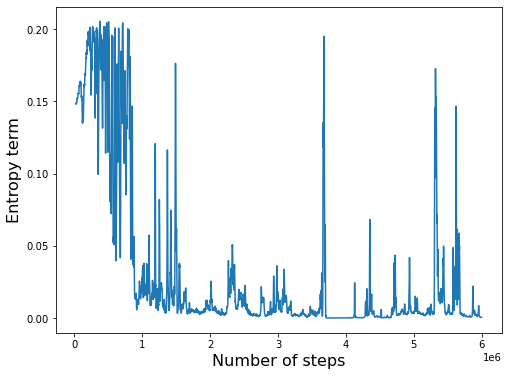

In [10]:
plot_IMPALA_session(results, map_name=flags['map_name'], moving_average=True, average_window=100)

In [11]:
print("Average asymptotic reward: %.2f"%score[-100:].mean())

Average asymptotic reward: 97.45


# Search for periodic peaks in the critic loss

In [179]:
threshold = 4000
mask = (baseline_loss > threshold)
non_zero = mask.nonzero()[0]
tolerance = 30
x_min = non_zero[0]
centers = []
clusters = []
cluster_elems = []
for i in range(len(non_zero)):
    if (non_zero[i] - x_min) <= tolerance:
        cluster_elems.append(non_zero[i])
    else:
        clusters.append(cluster_elems)
        centers.append(np.mean(cluster_elems))
        cluster_elems = [non_zero[i]]
        x_min = non_zero[i]
        
centers = np.array(centers)
print("Clusters: \n", clusters, '\n')
print("Centers: \n", centers)

Clusters: 
 [[31, 32, 34, 37, 43, 49, 61], [67, 73, 79, 91, 97], [103, 130], [136, 142, 148, 154], [220, 226, 232, 238, 247, 250], [256, 265, 271, 277, 283], [289, 313], [322, 337], [355, 361, 367, 373, 385], [391, 403, 406], [470]] 

Centers: 
 [ 41.   81.4 116.5 145.  235.5 270.4 301.  329.5 368.2 400.  470. ]


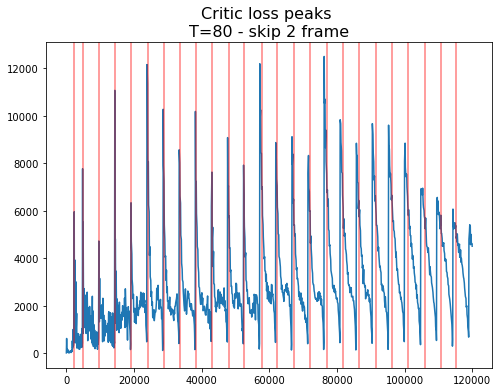

In [157]:
plt.figure(figsize = (8,6))
plt.title("Critic loss peaks \nT=80 - skip 2 frame", fontsize=16)
plt.plot(steps, baseline_loss)
T = flags['unroll_length']
for c in centers:
    plt.axvline(steps[int(c)], color='r', alpha=0.5)

In [156]:
distances = centers[1:] - centers[:-1] # measured in number of updates
# mask out outliers
mean = distances.mean()
std = distances.std()
mask = np.abs(distances - mean) > 3*std
print("Distances between centers: ", distances)
print("Outlier: ", mask)
distances = distances[~mask]
print("Filtered distances: ", distances)
print("Mean distance: %.2f +/- %.2f"%(distances.mean(), distances.std()/np.sqrt(len(distances)) ))

Distances between centers:  [32.         59.         60.         49.         42.5        40.5
 39.5        41.5        39.2        41.8        39.5        44.08333333
 38.41666667 41.5        40.         44.         40.         40.5
 41.         42.5        40.05       41.45       39.5        41.        ]
Outlier:  [False False False False False False False False False False False False
 False False False False False False False False False False False False]
Filtered distances:  [32.         59.         60.         49.         42.5        40.5
 39.5        41.5        39.2        41.8        39.5        44.08333333
 38.41666667 41.5        40.         44.         40.         40.5
 41.         42.5        40.05       41.45       39.5        41.        ]
Mean distance: 42.44 +/- 1.20


T = 80 -> mean distance 81.10 <br>
T = 60 -> mean distance 65.10; 60 (outlier manually counted off)

# MoveToBeacon

Target score: 26 (DeepMind)

In [2]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200727"
hms = "113216"
load_dir = "../logs/torchbeast"
#xpid = 'torchbeast-%s-%s'%(ymd,hms)
xpid = 'MoveToBeacon5'
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [97]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  MoveToBeacon
Batch size:  20
Total steps:  600000
Learning rate:  0.0003
Entropy cost:  0.0005


In [98]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [99]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
3,3,1.598350e+09,180,-962.512939,0.650000,-967.585754,5.223257,-0.150440
7,7,1.598350e+09,420,-233.367615,1.350000,-251.153198,17.941624,-0.156043
11,11,1.598350e+09,660,408.533417,0.750000,399.091431,9.589230,-0.147233
15,15,1.598350e+09,900,-373.875183,1.250000,-381.532410,7.811100,-0.153875
19,19,1.598350e+09,1140,-187.964676,1.600000,-192.428009,4.639153,-0.175826
...,...,...,...,...,...,...,...,...
9994,9994,1.598358e+09,599640,-278.725616,25.000000,-339.460693,60.816170,-0.081094
9995,9995,1.598358e+09,599700,35.413506,25.363638,-38.840382,74.337479,-0.083592
9997,9997,1.598358e+09,599820,120.593887,24.333334,49.069595,71.607460,-0.083165
9998,9998,1.598358e+09,599880,124.008156,25.666668,45.720352,78.370338,-0.082534


In [100]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

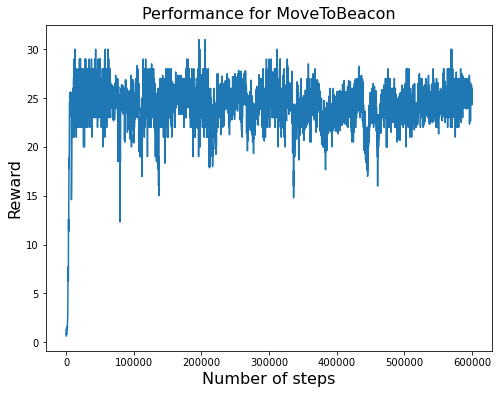

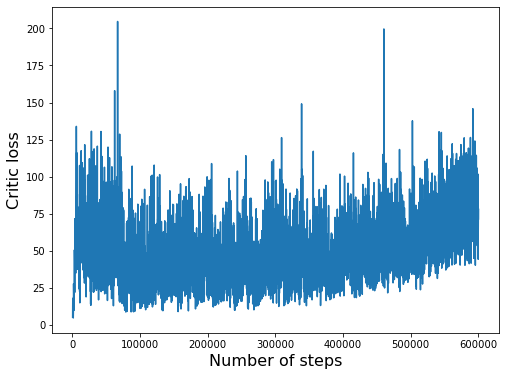

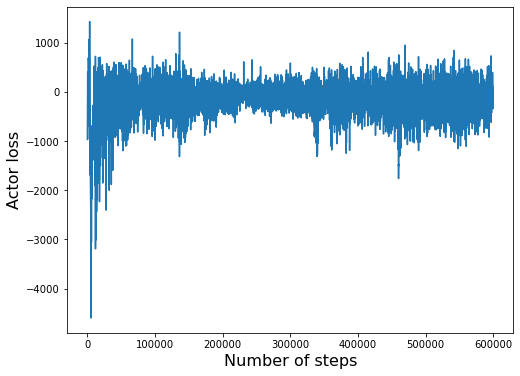

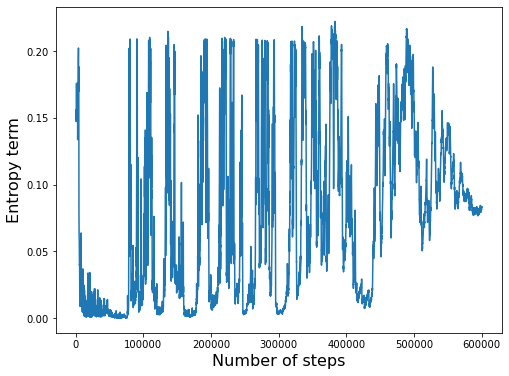

In [101]:
plot_IMPALA_session(results, flags['map_name'], moving_average=False, average_window=10)

In [102]:
print("Average asymptotic reward: %.2f"%score[-100:].mean())

Average asymptotic reward: 25.16


### Plot n runs

In [23]:
n_runs = 5
map_name = 'MoveToBeacon'
xpid = map_name+'%s'
load_dir = "../logs/torchbeast"
returns = []
steps = []
pg_losses = []
baseline_losses = []
entropy_losses = []
for n in range(1,n_runs+1):
    nth_xpid = xpid%n
    logfile = "%s/%s/logs.csv"%(load_dir,nth_xpid)
    logs = pd.read_csv(logfile)
    logs = logs[logs['mean_episode_return'].notna()]
    returns.append(np.array(logs['mean_episode_return']))
    steps.append(np.array(logs['step']))
    pg_losses.append(np.array(logs['pg_loss']))
    baseline_losses.append(np.array(logs['baseline_loss']))
    entropy_losses.append(np.array(logs['entropy_loss']))

In [24]:
test_means = []
test_devs = []
for n in range(1,n_runs+1):
    nth_xpid = xpid%n
    path = '%s/%s/test_results.npy'%(load_dir,nth_xpid)
    test_result = np.load(path)
    test_means.append(test_result.mean())
    test_devs.append(test_result.std()/np.sqrt(len(test_result))) # error of the mean
test_means = np.array(test_means)
test_devs = np.array(test_devs)
best_idx = np.argmax(test_means)
print("Best run: %d - Average return: %.2f +/- %.2f"%(best_idx+1, test_means[best_idx], test_devs[best_idx]))
print("Average return over 5 training runs: %.2f +/- %.2f"%(test_means.mean(), test_means.std()))

Best run: 1 - Average return: 25.56 +/- 0.18
Average return over 5 training runs: 25.21 +/- 0.27


In [25]:
def plot_n_runs(
    steps, 
    returns, 
    best_idx,
    map_name,
    asymptotic_return,
    asymptotic_mean_err,
    moving_average=True,
    average_window=100,
    alpha=0.3,
    n_runs=5
):
    plt.figure(figsize=(8,6))
    for n in range(n_runs):
        if moving_average:
            n_epochs = steps[n][average_window:]
        else:
            n_epochs = steps[n]

        if moving_average:
            score = np.array([np.mean(returns[n][i:i+average_window]) for i in range(len(n_epochs))])
        else:
            score = returns[n]

        label = r'$run ~ %d : %.1f \pm %.1f$'%(n+1, asymptotic_return[n],asymptotic_mean_err[n] )
        if n == best_idx:
            plt.plot(n_epochs, score, alpha = 1, label=label)
        else:
            plt.plot(n_epochs, score, alpha = 0.3, label=label)

    plt.legend(fontsize=15)
    plt.title("IMPALA performance for %s"%map_name, fontsize=18)
    plt.xlabel("Number of steps", fontsize=18)
    plt.ylabel("Total reward per episode", fontsize=18)
    plt.show()

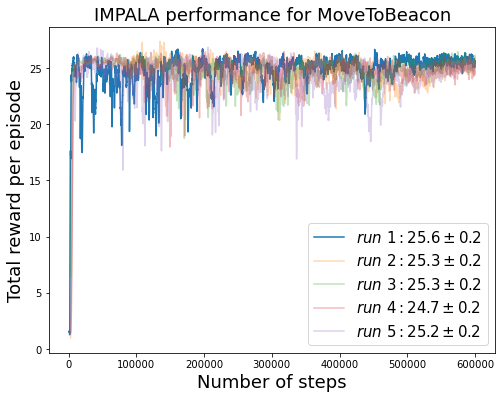

In [26]:
plot_n_runs(steps, returns, best_idx, map_name, test_means, test_devs, average_window=10)

# CollectMineralShards

Target score: 103 (DeepMind)

In [6]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200727"
hms = "113227"
load_dir = "../logs/torchbeast"
#xpid = 'torchbeast-%s-%s'%(ymd,hms)
xpid = 'CollectMineralShards4'
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

1: 97.93 (std 6.43) <br>


In [90]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  CollectMineralShards
Batch size:  20
Total steps:  6000000
Learning rate:  0.0003
Entropy cost:  0.0005


In [91]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [92]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
3,3,1.596930e+09,180,-1350.356812,16.000000,-1375.550537,25.314150,-0.120520
7,7,1.596930e+09,420,-7800.646973,14.700000,-8290.546875,490.090485,-0.190203
11,11,1.596930e+09,660,-9823.893555,15.950000,-10357.738281,534.024414,-0.179472
15,15,1.596930e+09,900,-7375.843750,16.900000,-7739.853516,364.169495,-0.159574
19,19,1.596930e+09,1140,-8540.927734,17.050001,-8867.724609,326.993469,-0.196545
...,...,...,...,...,...,...,...,...
99996,99996,1.597014e+09,5999760,24.146435,93.250000,-489.619263,513.769348,-0.003651
99997,99997,1.597014e+09,5999820,764.732117,94.142860,-185.572601,950.308472,-0.003731
99998,99998,1.597014e+09,5999880,1048.943359,92.800003,114.217987,934.728394,-0.003059
99999,99999,1.597014e+09,5999940,871.865479,94.250000,-255.252533,1127.121948,-0.003888


In [93]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

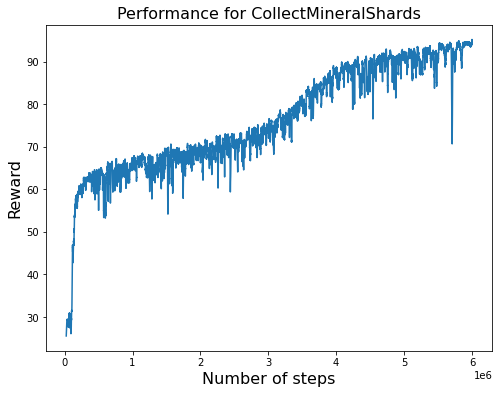

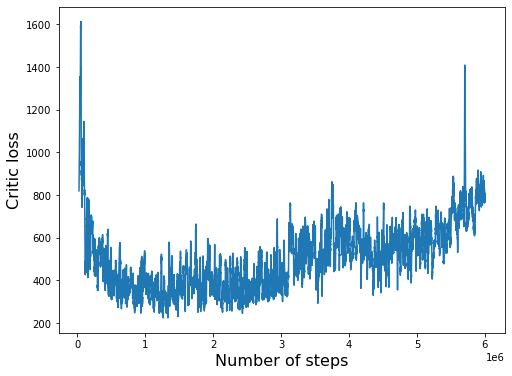

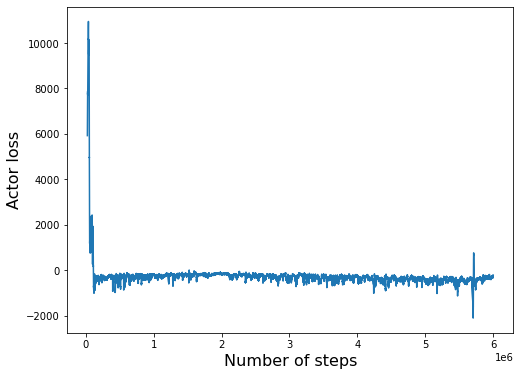

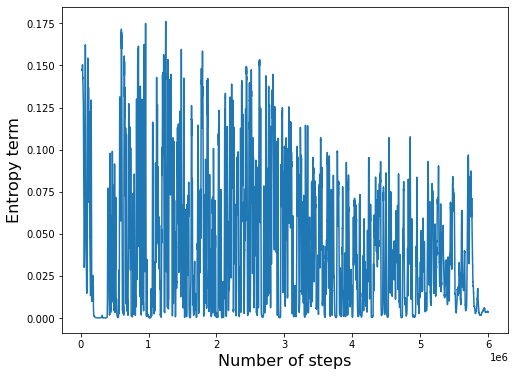

In [94]:
plot_IMPALA_session(results, flags['map_name'], moving_average=True, average_window=100)

In [144]:
print("Average asymptotic reward: %.2f"%score[-1000:].mean())

Average asymptotic reward: 98.91


### Plotting n runs

In [27]:
n_runs = 5
map_name = 'CollectMineralShards' #'CollectMineralShards_v2_'
xpid = map_name+'%s'
load_dir = "../logs/torchbeast"
returns = []
steps = []
pg_losses = []
baseline_losses = []
entropy_losses = []
for n in range(1,n_runs+1):
    nth_xpid = xpid%n
    logfile = "%s/%s/logs.csv"%(load_dir,nth_xpid)
    logs = pd.read_csv(logfile)
    logs = logs[logs['mean_episode_return'].notna()]
    returns.append(np.array(logs['mean_episode_return']))
    steps.append(np.array(logs['step']))
    pg_losses.append(np.array(logs['pg_loss']))
    baseline_losses.append(np.array(logs['baseline_loss']))
    entropy_losses.append(np.array(logs['entropy_loss']))

In [28]:
test_means = []
test_devs = []
for n in range(1,n_runs+1):
    nth_xpid = xpid%n
    path = '%s/%s/test_results.npy'%(load_dir,nth_xpid)
    test_result = np.load(path)
    test_means.append(test_result.mean())
    test_devs.append(test_result.std()/np.sqrt(len(test_result))) # error of the mean
test_means = np.array(test_means)
test_devs = np.array(test_devs)
best_idx = np.argmax(test_means)
print("Best run: %d - Average return: %.2f +/- %.2f"%(best_idx+1, test_means[best_idx], test_devs[best_idx]))
print("Average return over 5 training runs: %.2f +/- %.2f"%(test_means.mean(), test_means.std()))

Best run: 1 - Average return: 98.51 +/- 0.85
Average return over 5 training runs: 90.04 +/- 14.01


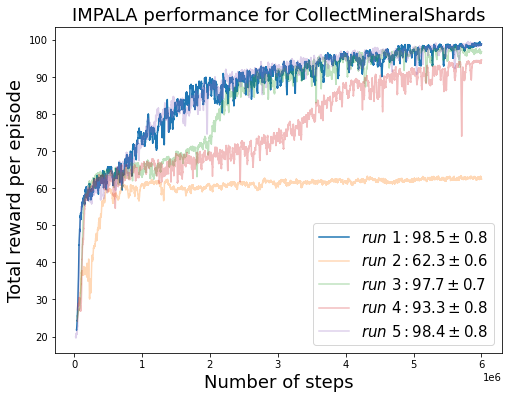

In [29]:
plot_n_runs(steps, returns, best_idx, map_name, test_means, test_devs, average_window=200, n_runs=n_runs)

# FindAndDefeatZerglings

Target score: 45 (DeepMind)

In [61]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200727"
hms = "113241"
load_dir = "../logs/torchbeast"
#xpid = 'torchbeast-%s-%s'%(ymd,hms)
xpid = 'FindAndDefeatZerglings5'
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [62]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  FindAndDefeatZerglings
Batch size:  20
Total steps:  6000000
Learning rate:  0.0003
Entropy cost:  0.0005


In [63]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [64]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.597011e+09,0,2139.039551,0.071429,1808.356079,330.832489,-1.489109e-01
1,1,1.597011e+09,60,416.084900,1.333333,325.035767,91.199387,-1.502670e-01
2,2,1.597011e+09,120,-1336.743164,3.500000,-1404.807861,68.202957,-1.382488e-01
3,3,1.597011e+09,180,461.186096,1.666667,429.809570,31.518248,-1.417203e-01
4,4,1.597011e+09,240,-2768.790771,4.666667,-2925.872070,157.237671,-1.565683e-01
...,...,...,...,...,...,...,...,...
99995,99995,1.597101e+09,5999700,1624.561523,40.250000,240.926041,1383.636597,-1.104875e-03
99996,99996,1.597101e+09,5999760,-961.481995,44.625000,-2343.387451,1381.906006,-5.677417e-04
99997,99997,1.597101e+09,5999820,158.688110,42.400002,-706.565552,865.253662,-7.152551e-09
99998,99998,1.597101e+09,5999880,786.643677,33.500000,57.156078,729.487610,-1.430510e-09


In [65]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

In [66]:
pg_loss[-100000:].mean()

-65.84253232391427

In [67]:
entropy_loss[-100000:].mean()

-0.0018956043853907128

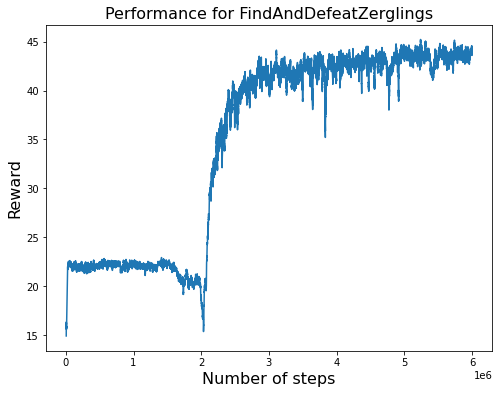

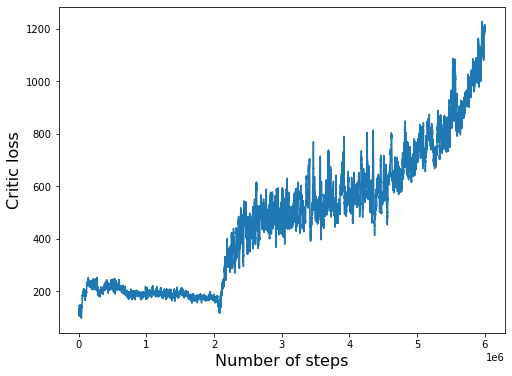

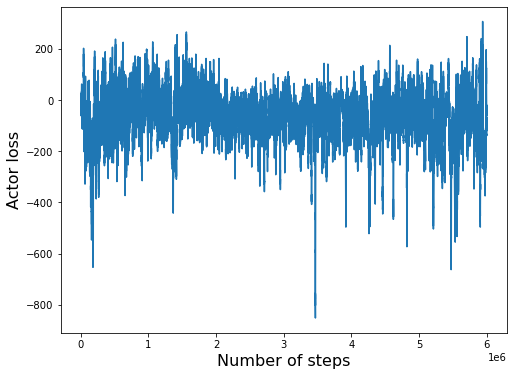

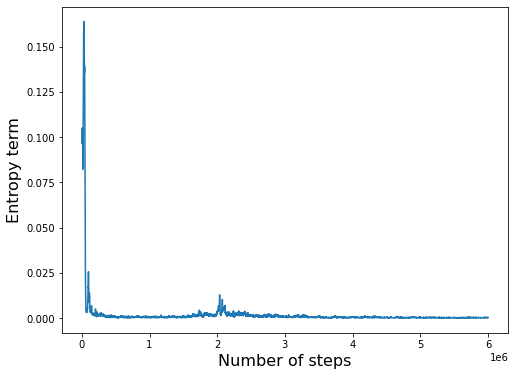

In [68]:
plot_IMPALA_session(results, flags['map_name'], moving_average=True, average_window=100)

In [69]:
print("Average asymptotic reward: %.2f"%score[-100:].mean())

Average asymptotic reward: 43.86


### Plotting n runs

In [30]:
n_runs = 5
map_name = 'FindAndDefeatZerglings'
xpid = map_name+'%s'
load_dir = "../logs/torchbeast"
returns = []
steps = []
pg_losses = []
baseline_losses = []
entropy_losses = []
for n in range(1,n_runs+1):
    nth_xpid = xpid%n
    logfile = "%s/%s/logs.csv"%(load_dir,nth_xpid)
    logs = pd.read_csv(logfile)
    logs = logs[logs['mean_episode_return'].notna()]
    returns.append(np.array(logs['mean_episode_return']))
    steps.append(np.array(logs['step']))
    pg_losses.append(np.array(logs['pg_loss']))
    baseline_losses.append(np.array(logs['baseline_loss']))
    entropy_losses.append(np.array(logs['entropy_loss']))

In [31]:
test_means = []
test_devs = []
for n in range(1,n_runs+1):
    nth_xpid = xpid%n
    path = '%s/%s/test_results.npy'%(load_dir,nth_xpid)
    test_result = np.load(path)
    test_means.append(test_result.mean())
    test_devs.append(test_result.std()/np.sqrt(len(test_result))) # error of the mean
test_means = np.array(test_means)
test_devs = np.array(test_devs)
best_idx = np.argmax(test_means)
print("Best run: %d - Average return: %.2f +/- %.2f"%(best_idx+1, test_means[best_idx], test_devs[best_idx]))
print("Average return over 5 training runs: %.2f +/- %.2f"%(test_means.mean(), test_means.std()))

Best run: 3 - Average return: 46.40 +/- 0.63
Average return over 5 training runs: 44.27 +/- 1.32


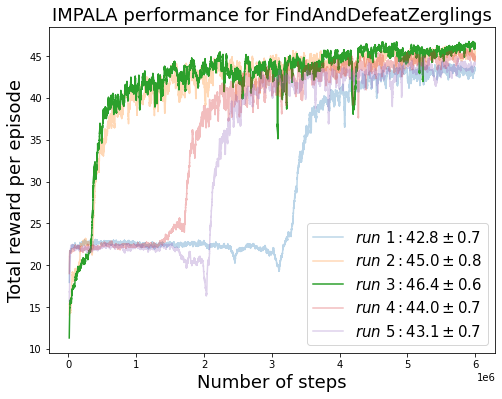

In [32]:
plot_n_runs(steps, returns, best_idx, map_name, test_means, test_devs, average_window=200)

# DefeatRoaches
Target: 100

In [2]:
load_dir = "../logs/torchbeast"
xpid = 'DefeatRoaches_v2_1' #'DefeatRoaches1'
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [3]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  DefeatRoaches
Batch size:  20
Total steps:  12000000
Learning rate:  1e-05
Entropy cost:  0.0005


In [4]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [5]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.598615e+09,0,-16892.875000,-2.333333,-18228.562500,1335.830811,-0.141816
1,1,1.598615e+09,60,-12396.993164,3.727273,-13142.941406,746.089233,-0.140935
2,2,1.598615e+09,120,-16759.464844,3.352941,-17997.980469,1238.657715,-0.143066
3,3,1.598615e+09,180,-16173.962891,-5.818182,-17422.968750,1249.146484,-0.140322
4,4,1.598615e+09,240,-22461.277344,6.833333,-25373.753906,2912.617188,-0.139949
...,...,...,...,...,...,...,...,...
199992,199992,1.598869e+09,11999520,-2.156985,0.000000,-1.945582,0.000028,-0.211430
199993,199993,1.598869e+09,11999580,-2.339381,0.000000,-2.127962,0.000029,-0.211448
199996,199996,1.598869e+09,11999760,-3.204671,0.000000,-2.993336,0.000056,-0.211391
199997,199997,1.598869e+09,11999820,0.459496,0.000000,0.670887,0.000005,-0.211396


In [6]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

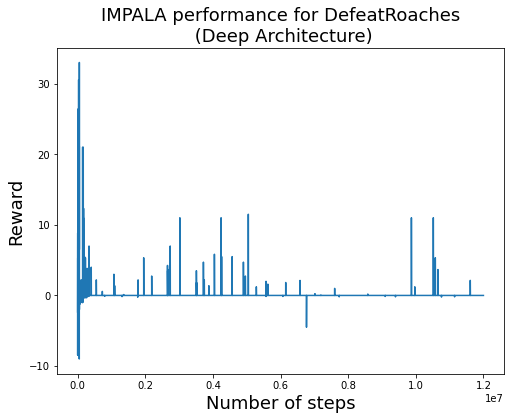

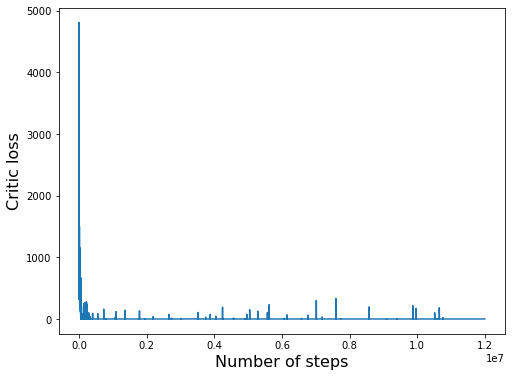

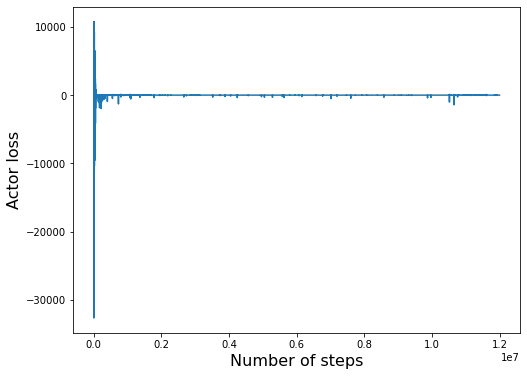

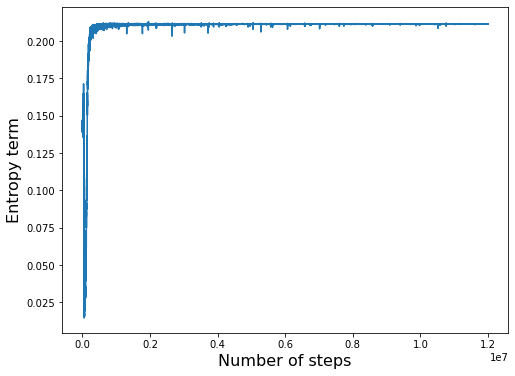

In [7]:
plot_IMPALA_session(results, flags['map_name'], moving_average=False, average_window=100)

# DefeatZerglingsAndBanelings
Target: 62

In [75]:
load_dir = "../logs/torchbeast"
xpid = 'DefeatZerglingsAndBanelings1'
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [76]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  DefeatZerglingsAndBanelings
Batch size:  20
Total steps:  16000000
Learning rate:  0.0003
Entropy cost:  0.0005


In [77]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [78]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.597090e+09,0,9962.647461,17.962963,9335.957031,626.840271,-0.149251
1,1,1.597090e+09,60,-1784.102173,15.379311,-1920.565552,136.603104,-0.139726
2,2,1.597090e+09,120,4871.278809,27.344828,4540.114746,331.312805,-0.148970
3,3,1.597090e+09,180,-1396.099731,19.291668,-1503.939087,107.972282,-0.132904
4,4,1.597090e+09,240,4021.976318,22.130436,3379.052734,643.079041,-0.155416
...,...,...,...,...,...,...,...,...
184219,184219,1.597327e+09,11053140,4493.714844,61.428574,2867.103516,1626.611328,-0.000027
184220,184220,1.597327e+09,11053200,1506.005127,56.147060,336.042786,1169.962402,-0.000055
184221,184221,1.597327e+09,11053260,3065.896484,60.741932,2278.614258,787.282227,-0.000040
184222,184222,1.597327e+09,11053320,1641.292969,56.870968,-86.014984,1727.307983,-0.000036


In [79]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

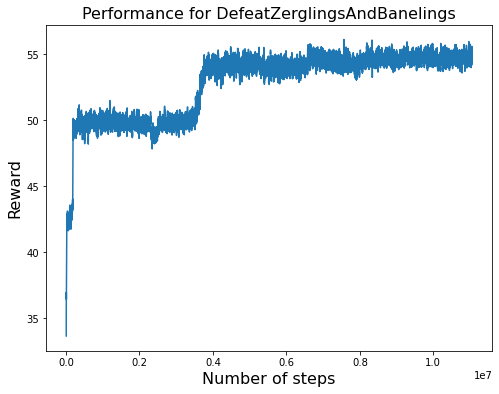

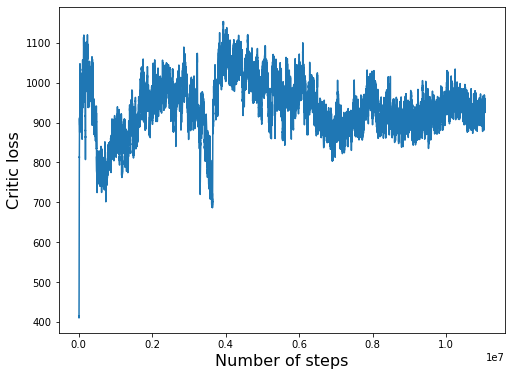

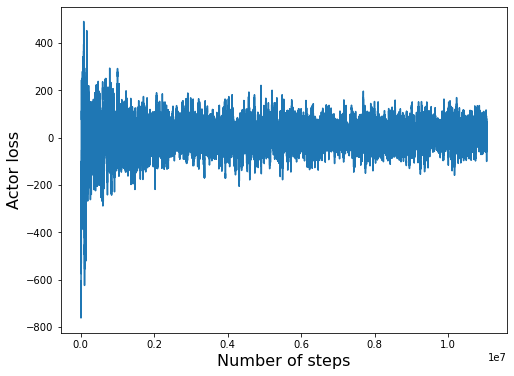

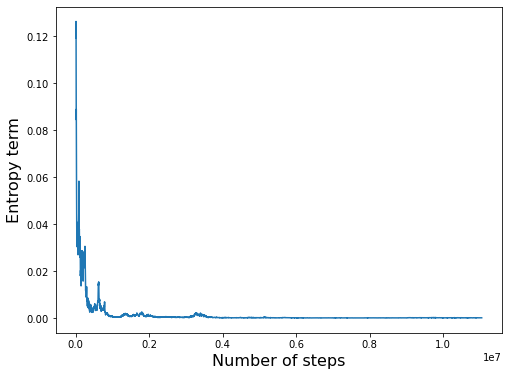

In [80]:
plot_IMPALA_session(results, flags['map_name'], moving_average=True, average_window=100)

In [81]:
print("Asymptotic score: %.2f"%score[-100:].mean())

Asymptotic score: 54.43


### Plot n runs

In [33]:
n_runs = 5
map_name = 'DefeatZerglingsAndBanelings'
xpid = map_name+'%s'
load_dir = "../logs/torchbeast"
returns = []
steps = []
pg_losses = []
baseline_losses = []
entropy_losses = []
for n in range(1,n_runs+1):
    nth_xpid = xpid%n
    logfile = "%s/%s/logs.csv"%(load_dir,nth_xpid)
    logs = pd.read_csv(logfile)
    logs = logs[logs['mean_episode_return'].notna()]
    returns.append(np.array(logs['mean_episode_return']))
    steps.append(np.array(logs['step']))
    pg_losses.append(np.array(logs['pg_loss']))
    baseline_losses.append(np.array(logs['baseline_loss']))
    entropy_losses.append(np.array(logs['entropy_loss']))

In [34]:
test_means = []
test_devs = []
for n in range(1,n_runs+1):
    nth_xpid = xpid%n
    path = '%s/%s/test_results.npy'%(load_dir,nth_xpid)
    test_result = np.load(path)
    test_means.append(test_result.mean())
    test_devs.append(test_result.std()/np.sqrt(len(test_result))) # error of the mean
test_means = np.array(test_means)
test_devs = np.array(test_devs)
best_idx = np.argmax(test_means)
print("Best run: %d - Average return: %.2f +/- %.2f"%(best_idx+1, test_means[best_idx], test_devs[best_idx]))
print("Average return over 5 training runs: %.2f +/- %.2f"%(test_means.mean(), test_means.std()))

Best run: 4 - Average return: 75.94 +/- 3.22
Average return over 5 training runs: 61.14 +/- 7.78


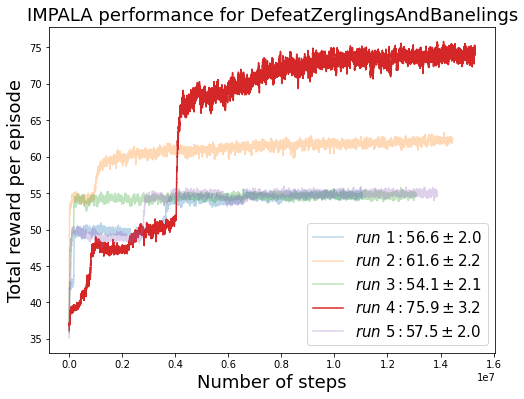

In [35]:
plot_n_runs(steps, returns, best_idx, map_name, test_means, test_devs, average_window=200)

# Summary

| Map Name| Best Run Average | 5 Runs Average | DM Average | Steps to train |
| --- | --- | --- | --- | --- |
| MoveToBeacon | 25.6 (0.2) | 25.2 (0.3) | 26 | 0.6 M |
| CollectMineralShards | 98.5 (0.8) | 90 (14) | 103 | 6M |
| FindAndDefeatZerglings | 46.4 (0.6) | 44 (1) | 45 | 6M |
| DefeatZerglingsAndBanelings | 76 (3) | 61 (8) | 62 | 11 - 16 M |

DefeatRoaches has been attempted but without success (asymptotic reward of 0). Using the bigger architecture did not improve the result given the same number of training steps.

CollectMineralsAndGas and BuildMarines have not been attempted, because they are even more demanding than DefeatRoaches.
